In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Final.xlsx')
df.shape

(120, 9)

In [3]:
df.head()

,Blast No.,HOLES,EXPLO.,MCPD,PPV MON,Seis. Dist.,A.O.P,Scaled distance (SD),95% SD
0,1,18,475.38,27.963529,8.63,100.0,119.4,18.910543,50.647672
1,2,15,375.00,26.785714,5.36,157.0,129.6,30.335282,82.840628
2,3,21,424.70,21.235000,3.68,300.0,100.0,65.102119,122.168505
3,4,17,450.30,28.143750,12.20,210.0,118.0,39.584787,35.419322
4,5,35,1167.60,34.340000,8.00,300.0,112.0,51.194241,54.773260


In [4]:
df.drop("Blast No.", axis = 1, inplace = True)

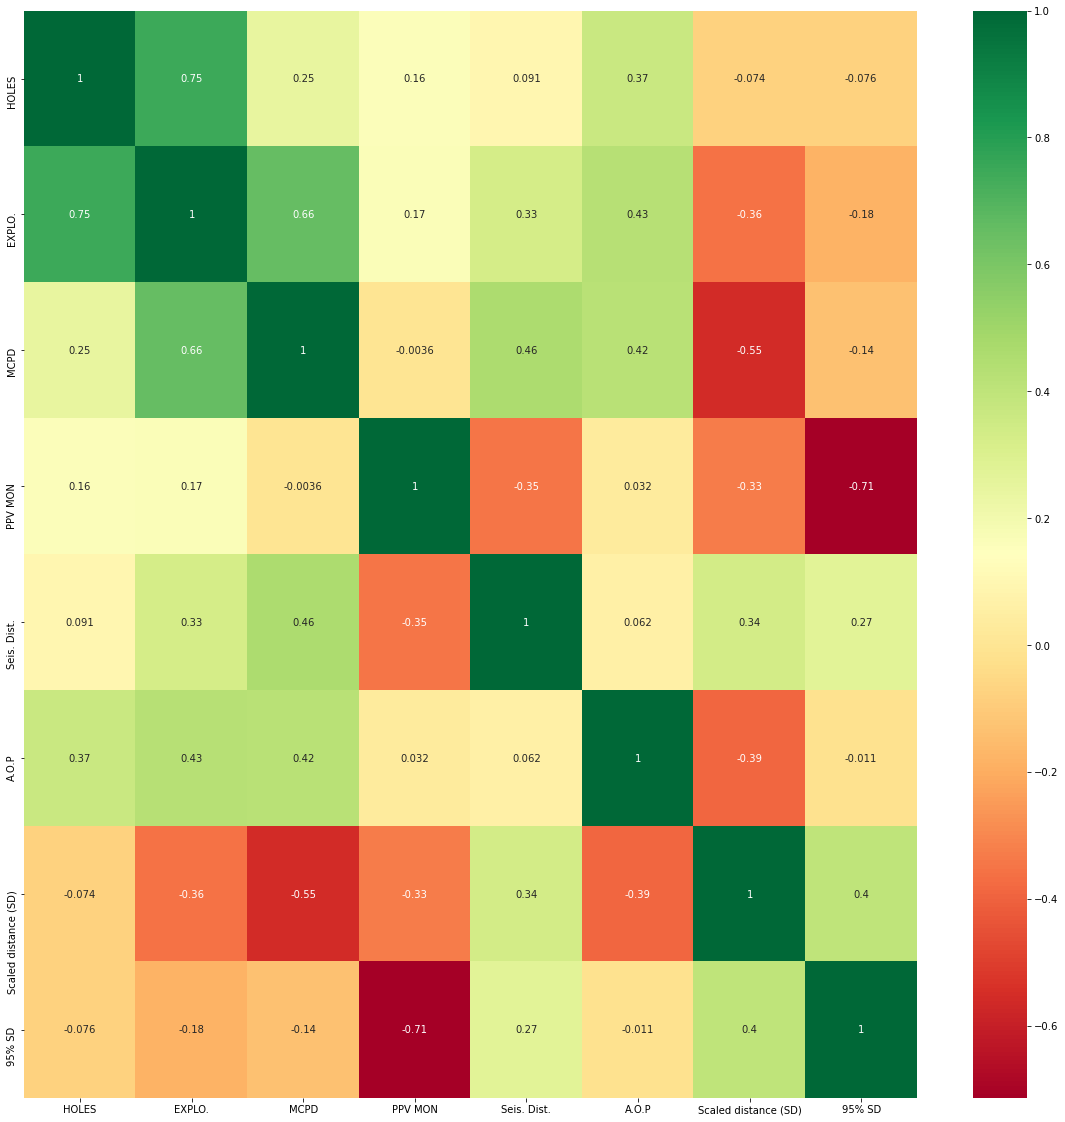

In [5]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
# Here 95% SD and PPV MON are Highly correlated but 95 % SD is derived from PPV MON so we will
# remove 95 % SD.

df.drop("95% SD", axis = 1, inplace = True)

In [7]:
df.head()

,HOLES,EXPLO.,MCPD,PPV MON,Seis. Dist.,A.O.P,Scaled distance (SD)
0,18,475.38,27.963529,8.63,100.0,119.4,18.910543
1,15,375.00,26.785714,5.36,157.0,129.6,30.335282
2,21,424.70,21.235000,3.68,300.0,100.0,65.102119
3,17,450.30,28.143750,12.20,210.0,118.0,39.584787
4,35,1167.60,34.340000,8.00,300.0,112.0,51.194241


In [8]:
cols = list(df.columns.values)
df = df[cols[0:3] + cols[4:7] + [cols[3]]]

In [9]:
df.head()

,HOLES,EXPLO.,MCPD,Seis. Dist.,A.O.P,Scaled distance (SD),PPV MON
0,18,475.38,27.963529,100.0,119.4,18.910543,8.63
1,15,375.00,26.785714,157.0,129.6,30.335282,5.36
2,21,424.70,21.235000,300.0,100.0,65.102119,3.68
3,17,450.30,28.143750,210.0,118.0,39.584787,12.20
4,35,1167.60,34.340000,300.0,112.0,51.194241,8.00


In [10]:
# After 95 % SD, Seismic Distance and Scaled Distance are the 2 most correlated features with PPV MON.
# But Scaled Dist. is derived from Sesimic dist. and MCPD. So we take Scaled Dist. as Dep. Feature.

X = df.iloc[:, [-2]]
y = df.iloc[:, [-1]]

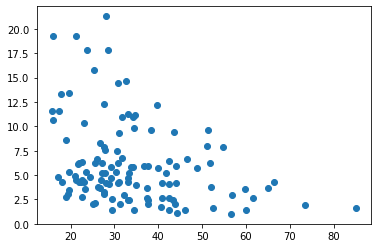

In [11]:
plt.scatter(X, y, cmap = True)
plt.show()

In [12]:
#IQR=df['Scaled distance (SD)'].quantile(0.75)-df['Scaled distance (SD)'].quantile(0.25)

#lower_bridge=df['Scaled distance (SD)'].quantile(0.25)-(IQR*1.5)
#upper_bridge=df['Scaled distance (SD)'].quantile(0.75)+(IQR*1.5)
#print(lower_bridge), print(upper_bridge)

In [13]:
#df = df[(df['Scaled distance (SD)']<upper_bridge) & (df['Scaled distance (SD)']>lower_bridge)]

In [14]:
X = df.iloc[:, [-2]]
y = df.iloc[:, [-1]]

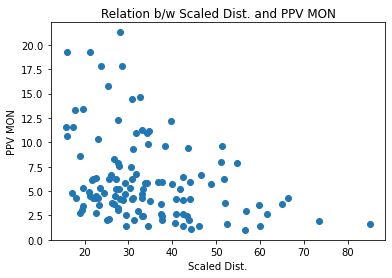

In [15]:
plt.scatter(X, y, cmap = True)
plt.xlabel('Scaled Dist.')
plt.ylabel('PPV MON')
plt.title('Relation b/w Scaled Dist. and PPV MON')
plt.show()

In [16]:
# Applying logarithmic Transformation
X = np.log(X)
y = np.log(y)

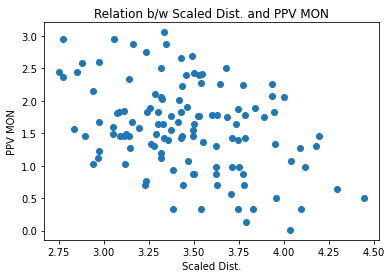

In [17]:
# After Logarithmic Transformation.
plt.scatter(X, y, cmap = True)  
plt.xlabel('Scaled Dist.')
plt.ylabel('PPV MON')
plt.title('Relation b/w Scaled Dist. and PPV MON')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
#1. Applying Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.score(X_train, y_train)

0.15106144300508706

In [22]:
lr.score(X_test, y_test)

0.13048784717833162

In [23]:
m = lr.coef_

In [24]:
b = lr.intercept_

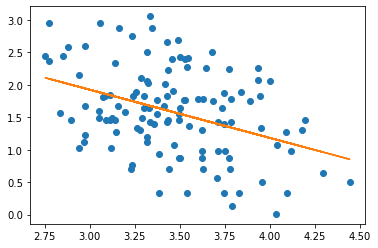

In [25]:
plt.plot(X,y,'o')
plt.plot(X, m*X + b)

In [26]:
prediction = lr.predict(X_test)

In [27]:
y_test_real = np.power(2.71,y_test)
prediction_real = np.power(2.71,prediction)

In [28]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test_real, prediction_real))
print('MSE:', metrics.mean_squared_error(y_test_real, prediction_real))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_real, prediction_real)))

MAE: 2.9054267928296724
MSE: 16.04859446195749
RMSE: 4.006069702583504


In [29]:
lr.coef_

array([[-0.74334124]])

In [30]:
lr.intercept_

array([4.15590534])

In [31]:
# 2. ANN

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = df.iloc[:, [-2]]
y = df.iloc[:, [-1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [32]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from tensorflow.keras.activations import relu, sigmoid

In [33]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 1, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=16,
                                            max_value=512,
                                            step=16),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [34]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=10,
    executions_per_trial=5,
    directory='project',
    project_name='PPV')

In [35]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 16, 'sampling': None}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}


In [36]:
tuner.search(X_train_scaled, y_train,
             epochs=20,
             validation_data=(X_test_scaled, y_test))

Trial 10 Complete [00h 00m 19s]
val_mean_absolute_error: 3.7079670906066893

Best val_mean_absolute_error So Far: 2.635526990890503
Total elapsed time: 00h 02m 54s
INFO:tensorflow:Oracle triggered exit


In [37]:
models = tuner.get_best_models(num_models=2)

In [38]:
models

In [39]:
tuner.results_summary()

Results summary
Results in project\PPV
Showing 10 best trials
Objective(name='val_mean_absolute_error', direction='min')
Trial summary
Hyperparameters:
num_layers: 4
units_0: 432
learning_rate: 0.1
units_1: 464
units_2: 192
units_3: 176
units_4: 288
units_5: 144
units_6: 336
units_7: 384
units_8: 160
units_9: 496
units_10: 208
units_11: 336
units_12: 416
units_13: 112
units_14: 112
units_15: 64
units_16: 208
Score: 2.635526990890503
Trial summary
Hyperparameters:
num_layers: 1
units_0: 320
learning_rate: 0.1
units_1: 432
units_2: 32
units_3: 352
units_4: 224
units_5: 128
units_6: 384
units_7: 64
units_8: 288
units_9: 352
units_10: 240
units_11: 480
units_12: 192
units_13: 128
units_14: 384
units_15: 208
units_16: 32
units_17: 400
units_18: 336
Score: 2.8301609992980956
Trial summary
Hyperparameters:
num_layers: 14
units_0: 64
learning_rate: 0.001
units_1: 416
units_2: 96
units_3: 400
units_4: 496
units_5: 32
units_6: 32
units_7: 16
units_8: 368
units_9: 256
units_10: 448
units_11: 448


In [40]:
# 3. Random Forest

from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 2, stop = 100, num = 2)]
max_features = ["auto", "sqrt", "log2"]
max_depth = [int(x) for x in np.linspace(1, 20, num = 1)]
min_samples_split = [1, 3, 5, 6, 7, 10]
min_samples_leaf = [5, 10, 12, 15, 20]


random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [2, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1], 'min_samples_split': [1, 3, 5, 6, 7, 10], 'min_samples_leaf': [5, 10, 12, 15, 20]}


In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf_random = GridSearchCV(estimator = rf, param_grid=random_grid, scoring='neg_mean_squared_error', cv = 5, verbose=4, n_jobs = -1)

In [42]:
X = df.iloc[:, [-2]]
y = df.iloc[:, [-1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 885 out of 900 | elapsed:   32.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   32.3s finished
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [44]:
rf_random.best_params_

{'max_depth': 1,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'min_samples_split': 10,
 'n_estimators': 2}

In [45]:
y_pred

array([4.1823766 , 6.79494898, 6.79494898, 4.1823766 , 6.79494898,
       6.79494898, 4.1823766 , 4.1823766 , 4.1823766 , 6.79494898,
       6.79494898, 6.79494898, 4.1823766 , 6.79494898, 6.79494898,
       4.1823766 , 4.1823766 , 4.1823766 , 5.62854898, 4.1823766 ,
       5.62854898, 4.1823766 , 4.1823766 , 4.1823766 ])

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.034273849326965
MSE: 18.57396249836053
RMSE: 4.309752022838499
